In [56]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

In [10]:
hashtag_stance_df = pd.read_csv("final_stance_hashtag.csv")
hashtag_stance = hashtag_stance_df["stance"]
stance_df = pd.read_csv("final_stance_word.csv")
stance = stance_df["stance"]

In [11]:
info_df = pd.read_csv('indiv_strength_diversity.csv')
info_df["stance"] = stance
info_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.083432,0.916568,1,1.0,0.0,-0.8140
1,ABGYNservices,0,0.661536,0.338464,-1,0.0,1.0,0.1990
2,Abigailschumach,1,0.151695,0.848305,1,1.0,0.0,-0.2640
3,Alboteaparty,0,0.520985,0.479015,1,1.0,0.0,0.0747
4,alexdelong_,1,0.136951,0.863049,1,1.0,0.0,-0.2710


In [30]:
info_hashtag_df = pd.read_csv('hashtag_indiv_strength_diversity.csv')
info_hashtag_df['stance'] = hashtag_stance
info_hashtag_df.head()

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
0,ABabysRights,1,0.112896,0.887104,1,1.0,0.0,-0.7850
1,ABGYNservices,0,0.541203,0.458797,-1,0.0,1.0,0.0789
2,Abigailschumach,1,0.305871,0.694129,1,1.0,0.0,-0.1090
3,Alboteaparty,0,0.561752,0.438248,1,1.0,0.0,0.1150
4,alexdelong_,1,0.141862,0.858138,1,1.0,0.0,-0.2660


$follower\_of$ column is marked as -1 if the account is a follower of prochoice account, 1 if the account is a follower of prolife account, 0 if both. The stance is in the range [-1, 1], 1 = prochoice, -1 = prolife.

In [54]:
info_hashtag_df['stance'][1]

0.078899999999999998

In [57]:
diff = [info_hashtag_df['stance'][i]>0 and info_df['stance'][i]<0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff)

10

In [58]:
diff_2 = [info_hashtag_df['stance'][i]<0 and info_df['stance'][i]>0 for i in range(0, len(info_hashtag_df['stance']))]
np.sum(diff_2)

0

---
#  "prochoice_strength", "prolife_strength" and the "follower of" 

We will examinate the relationship from the dataframe with result calculated by using different set of words in tweets (hashtag or bag of word).

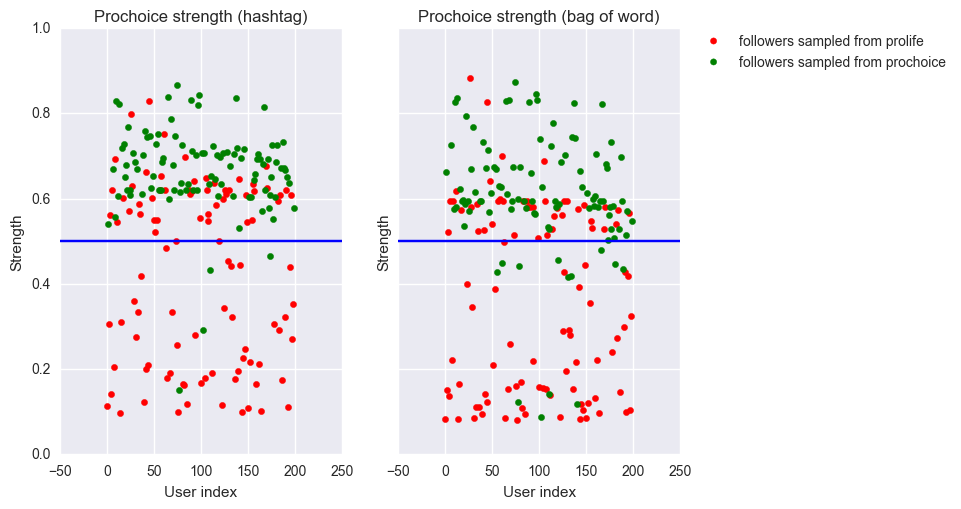

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prochoice strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prochoice_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prochoice_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prochoice strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

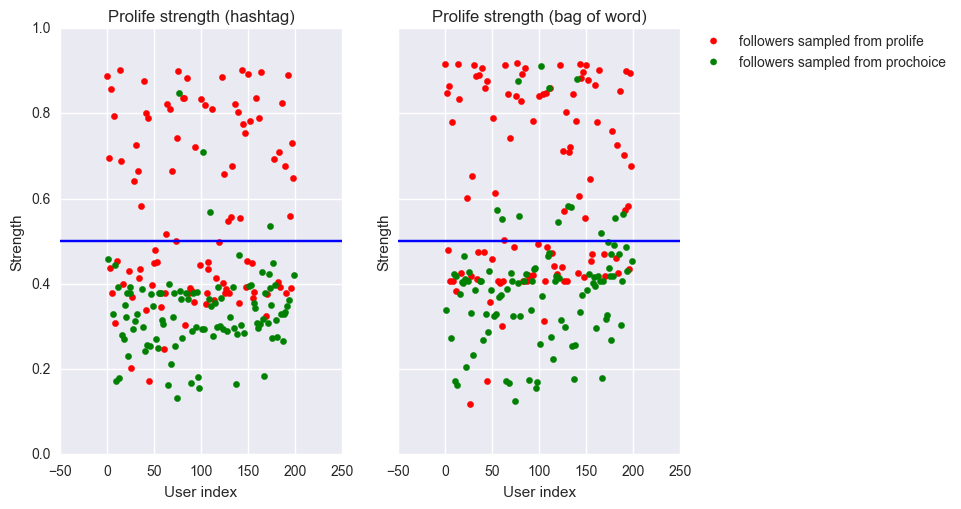

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax1.axhline(y=0.5)
ax1.set_title("Prolife strength (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylabel("Strength")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'prolife_strength'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'prolife_strength'],
            color='g', label='followers sampled from prochoice')
ax2.axhline(y=0.5)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_title("Prolife strength (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("Strength")
plt.show()

---
# "stance" vs the "follower of" 

Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice


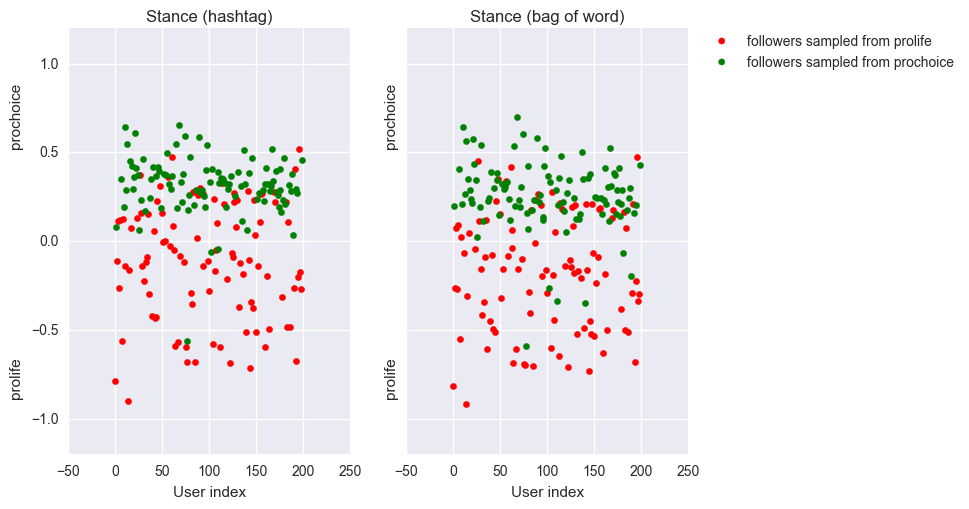

In [51]:
print("Stance is in the range [-1, 1], -1 means extremely prolife, 1 means extremely prochoice")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df[info_hashtag_df['follower of']==-1].index, 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax1.set_title("Stance (hashtag)")
ax1.set_xlabel("User index")
ax1.set_ylim([-1.2, 1.2])
ax1.set_ylabel("prolife                                                 prochoice")

ax2.scatter(x=info_df[info_df['follower of']==1].index, 
            y=info_df.loc[info_df['follower of']==1, 'stance'],
            color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df[info_df['follower of']==-1].index, 
            y=info_df.loc[info_df['follower of']==-1, 'stance'],
            color='g', label='followers sampled from prochoice')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_ylim([-1.2, 1.2])
ax2.set_title("Stance (bag of word)")
ax2.set_xlabel("User index")
ax2.set_ylabel("prolife                                                 prochoice")
plt.show()

---
#### Plot the relationship between the stance and the following proportions

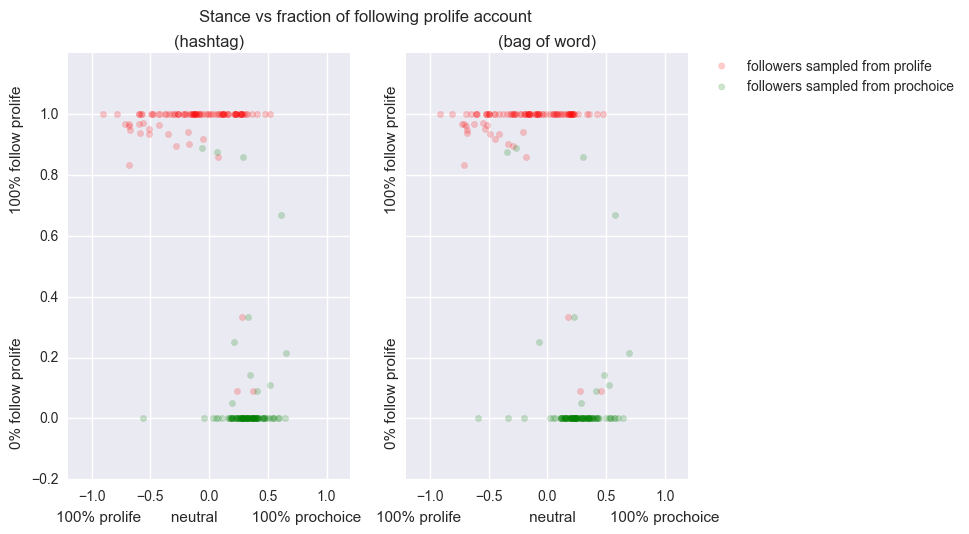

In [85]:

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prolife                             100% follow prolife")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prolife proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prolife proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prolife                             100% follow prolife")
plt.suptitle("Stance vs fraction of following prolife account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

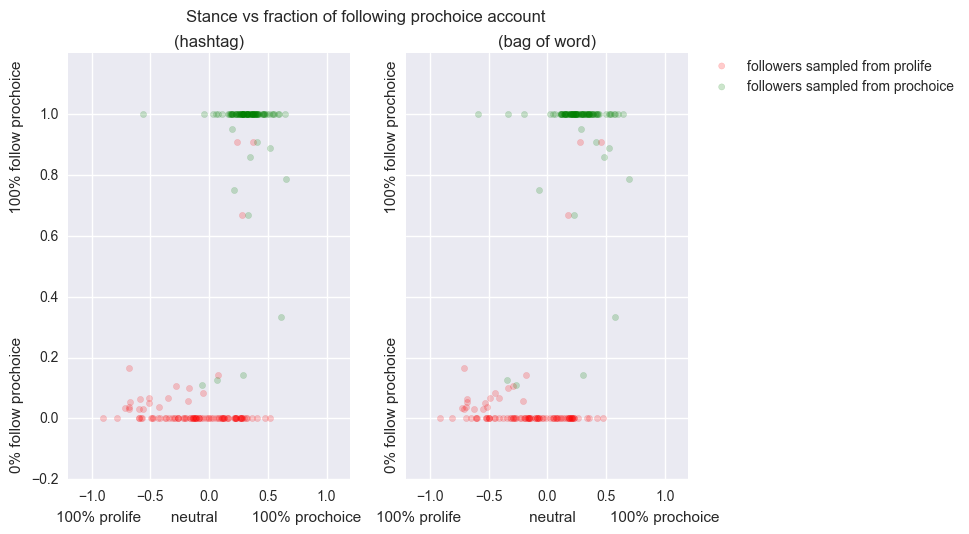

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax1.scatter(x=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "stance"], 
            y=info_hashtag_df.loc[info_hashtag_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax1.set_title("(hashtag)")
ax1.set_xlabel("100% prolife       neutral        100% prochoice")
ax1.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax1.set_ylabel("0% follow prochoice                             100% follow prochoice")

ax2.scatter(x=info_df.loc[info_df['follower of']==1, "stance"], 
            y=info_df.loc[info_df['follower of']==1, "prochoice proportion"],
            alpha=0.2, color='r', label='followers sampled from prolife')
ax2.scatter(x=info_df.loc[info_df['follower of']==-1, "stance"], 
            y=info_df.loc[info_df['follower of']==-1, "prochoice proportion"],
            alpha=0.2, color='g', label='followers sampled from prochoice')
ax2.set_xlim([-1.2, 1.2])
ax1.set_ylim([-0.2, 1.2])
ax2.set_title("(bag of word)")
ax2.set_xlabel("100% prolife                neutral        100% prochoice")
ax2.set_ylabel("0% follow prochoice                             100% follow prochoice")
plt.suptitle("Stance vs fraction of following prochoice account ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

--------
# Examine unusal individuals

Individuals who have an extreme stance, e.g. above 0.5 or below -0.5 score, are considered to have more similarities with known prolife/prochoice group. That indicates they tweet in a manner that is similar to prolife/prochoice accounts do. This similarity is in perspective of context and the usage of hashtag. However, if some individuals have a high similarity with a specific group but are following a lot of the opposite group, that is considered to be "unusal" and those are the people we are interested in looking at.

In [88]:
# pick out people whose stance tends to be prochoice but follow more prolife than prochoice
prochoice_unusual_indiv = info_hashtag_df.loc[info_hashtag_df["stance"]>0]\
                          .loc[info_hashtag_df["prochoice proportion"]<info_hashtag_df["prolife proportion"]]  

In [89]:
prochoice_unusual_indiv

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
3,Alboteaparty,0,0.561752,0.438248,1,1.000000,0.000000,0.11500
5,AllanLohr,0,0.620640,0.379360,1,1.000000,0.000000,0.12100
8,AngelaFairbanks,0,0.692590,0.307410,1,1.000000,0.000000,0.12300
17,basvandervoort,0,0.600992,0.399008,1,1.000000,0.000000,0.07470
21,bo_rajer,0,0.620640,0.379360,-1,0.666667,0.333333,0.60900
23,BrianChiasson,0,0.570949,0.429051,1,1.000000,0.000000,0.13000
27,CaRi1765,0,0.630515,0.369485,1,1.000000,0.000000,0.16100
35,clayguy83,0,0.564452,0.435548,1,1.000000,0.000000,0.15600
41,CSLCHSnMore,0,0.661629,0.338371,1,1.000000,0.000000,0.05700
45,defenderofthe8,0,0.828466,0.171534,1,1.000000,0.000000,0.22800


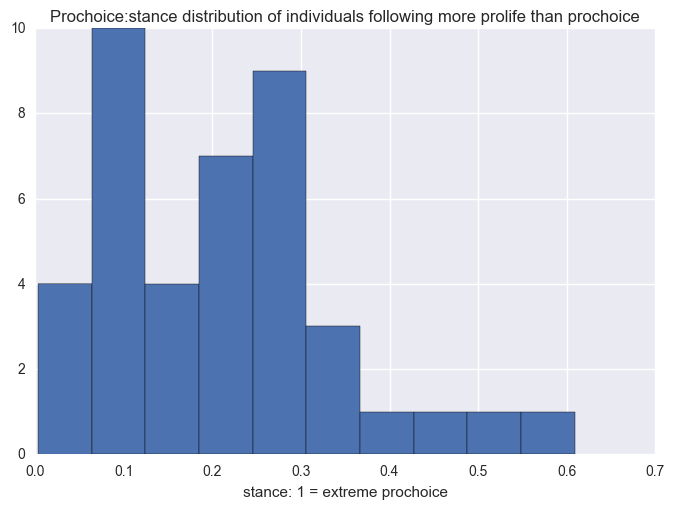

In [90]:
plt.hist(x=prochoice_unusual_indiv["stance"])
plt.title("Prochoice:stance distribution of individuals following more prolife than prochoice")
plt.xlabel("stance: 1 = extreme prochoice")
plt.show()

In [91]:
# pick out people whose stance tends to be prolife but follow more prochoice than prolife
info_hashtag_df.loc[info_hashtag_df["stance"]<0]\
.loc[info_hashtag_df["prochoice proportion"]>info_hashtag_df["prolife proportion"]]

,account_name,predict_class,prochoice_strength,prolife_strength,follower of,prolife proportion,prochoice proportion,stance
77,ibiloh,1,0.151891,0.848109,-1,0.0,1.0,-0.5600
110,KmTilley,1,0.431465,0.568535,-1,0.0,1.0,-0.0431


---
#### Distribution of the following fractions from individuals sampled from prolife group and prochoice group

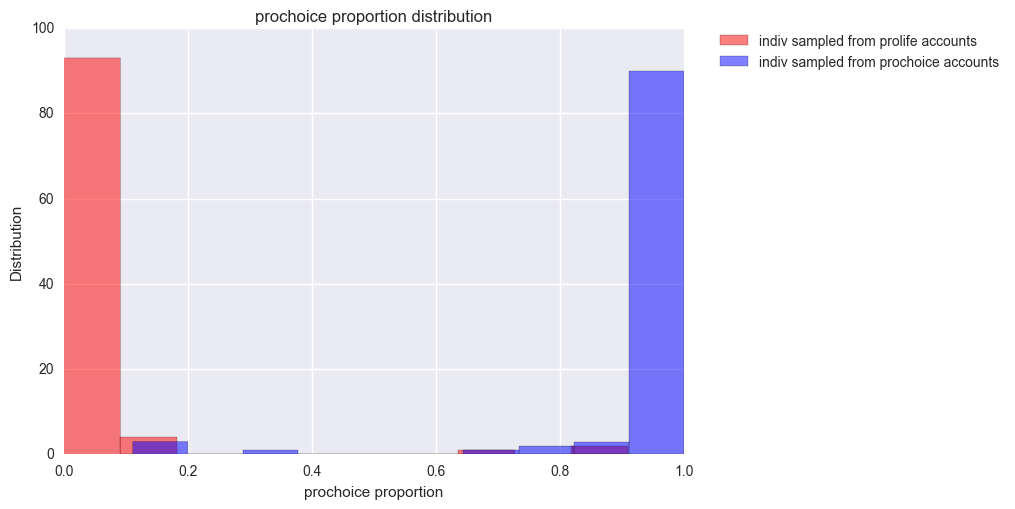

In [87]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prochoice proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prochoice proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prochoice proportion")
plt.title("prochoice proportion distribution")
plt.show()

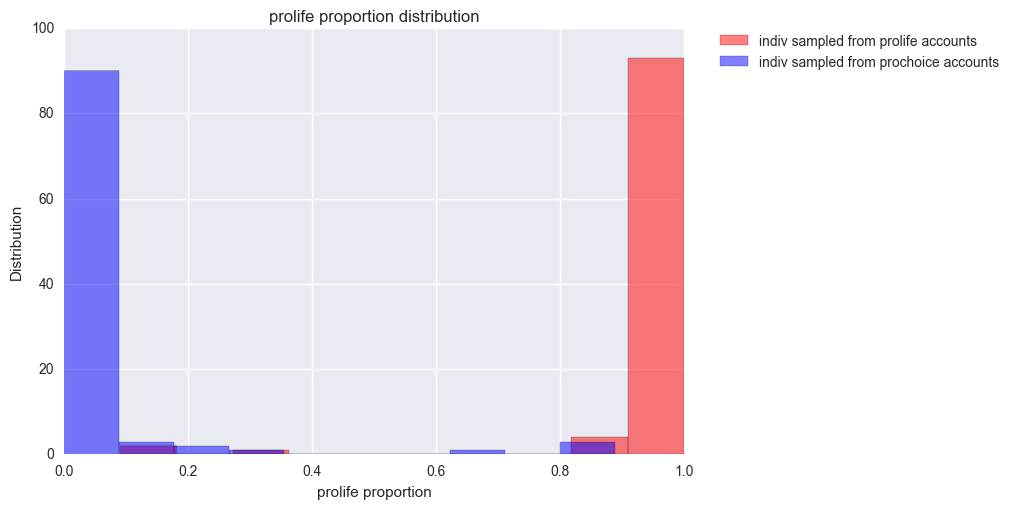

In [88]:
plt.hist(x=info_df.loc[info_df["follower of"]==1, "prolife proportion"], color='r', alpha=0.5,
         label="indiv sampled from prolife accounts")
plt.hist(x=info_df.loc[info_df["follower of"]==-1, "prolife proportion"], color='b', alpha=0.5,
         label="indiv sampled from prochoice accounts")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Distribution")
plt.xlabel("prolife proportion")
plt.title("prolife proportion distribution")
plt.show()